# RNN layers

NSF models use 1D convolution and Bi-directional LSTM RNN layers.

The Bi-LSTM RNN wrapper **BLSTM(input_dim, output_dim)** is defined below because:

1. Pytorch LSTM defines hidden_size as feature dimension in one direction; I prefer define using output dimension to denote the sum of the feature dimensions in two directions;

2. Default LSTM assumes tensor shape as (length, batch, dim)

### 1. BLSTM wrapper

In [6]:
import torch
import torch.nn as torch_nn
import torch.nn.functional as torch_nn_func

class BLSTMLayer(torch_nn.Module):
    """ Wrapper over lstm
    Input tensor:  (batchsize=1, length, dim_in)                         
    Output tensor: (batchsize=1, length, dim_out)                        
    We want to keep the length the same
    
    Define:
        BLSTMLayer(input_dim, output_dim)
    input_dim: dimension of input tensor
    output_dim: dimension of output tensor
    
    """
    def __init__(self, input_dim, output_dim):
        super(BLSTMLayer, self).__init__()
        
        # Assume output_dim is the sum of feature dimension in 
        # two directions
        if output_dim % 2 != 0:
            print("Output_dim of BLSTMLayer is {:d}".format(output_dim))
            print("BLSTMLayer expects a layer size of even number")
            sys.exit(1)
            
        # bi-directional LSTM
        self.l_blstm = torch_nn.LSTM(input_dim, output_dim // 2, \
                                     bidirectional=True)
    def forward(self, x):
        # We can also use batch_first=True instead of permute
        # permute to (length, batchsize=1, dim)                          
        y, _ = self.l_blstm(x.permute(1, 0, 2))
        # permute it backt to (batchsize=1, length, dim)
        return y.permute(1, 0, 2)


(<Figure size 151.2x187.2 with 2 Axes>,
  <matplotlib.axes._axes.Axes at 0x7fa1416c6460>])

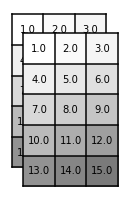

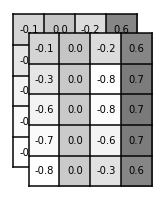

In [7]:
# Try one sample
import plot_lib

# some configurations
data = torch.zeros([2, 5, 3])
data[0] = torch.tensor([[1,2,3], [4,5,6], [7,8,9], [10,11,12],[13,14,15]])
data[1] = torch.tensor([[1,2,3], [4,5,6], [7,8,9], [10,11,12],[13,14,15]])

batch_size = data.shape[0]
frame_length = data.shape[1]
input_feature_dim = data.shape[2]
output_feature_dim = 4

with torch.no_grad():
    # create input data
    input_data = data 
    #torch.rand(batch_size, frame_length, input_feature_dim)
    # create blstm layer
    torch.manual_seed(1)
    l_blstm = BLSTMLayer(input_feature_dim, output_feature_dim)
    # compute output data
    output_data = l_blstm(input_data)

# input tensor
plot_lib.plot_tensor(data, color_on_value=True)

# output tensor
plot_lib.plot_tensor(output_data, color_on_value=True)


Input data shape: torch.Size([2, 5, 3])
Output data shape: torch.Size([2, 5, 4])


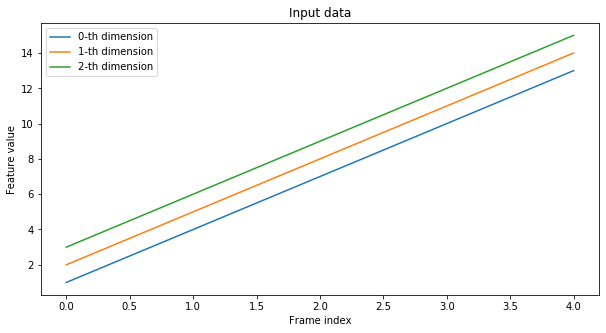

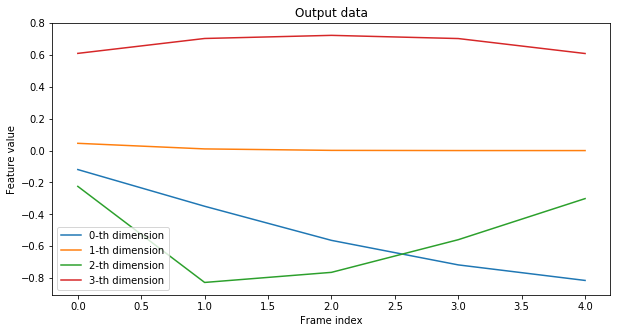

In [3]:
import matplotlib
import matplotlib.pyplot as plt
matplotlib.rcParams['figure.figsize'] = (10, 5)

# plot input data (the 1st sequence in the batch)
fig = plt.figure()
axis = fig.add_subplot(111)
axis.plot(input_data[0, :, :]);
axis.set_xlabel('Frame index')
axis.set_ylabel('Feature value')
axis.legend([str(x) + '-th dimension' for x in range(input_feature_dim)])
axis.set_title('Input data')

# plot output data (the 1st sequence in the batch)
fig = plt.figure()
axis = fig.add_subplot(111)
axis.plot(output_data[0, :, :]);
axis.set_xlabel('Frame index')
axis.set_ylabel('Feature value')
axis.legend([str(x) + '-th dimension' for x in range(output_feature_dim)])
axis.set_title('Output data')


# print data shape
print("Input data shape: " + str(input_data.shape))
print("Output data shape: " + str(output_data.shape))

### 2. Permute

(<Figure size 151.2x187.2 with 2 Axes>,
  <matplotlib.axes._axes.Axes at 0x7fa140079c70>])

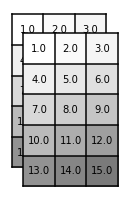

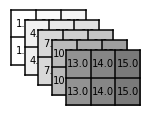

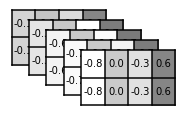

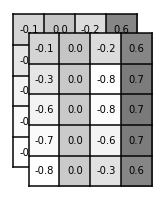

In [4]:
data = torch.zeros([2, 5, 3])
data[0] = torch.tensor([[1,2,3], [4,5,6], [7,8,9], [10,11,12],[13,14,15]])
data[1] = torch.tensor([[1,2,3], [4,5,6], [7,8,9], [10,11,12],[13,14,15]])

plot_lib.plot_tensor(data, color_on_value=True)

plot_lib.plot_tensor(data.permute(1, 0, 2), color_on_value=True)

plot_lib.plot_tensor(output_data.permute(1, 0, 2), color_on_value=True)

plot_lib.plot_tensor(output_data, color_on_value=True)

(<Figure size 115.2x367.2 with 2 Axes>,
  <matplotlib.axes._axes.Axes at 0x7fa1413c66a0>])

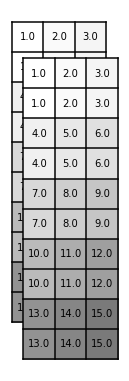

In [5]:
data = torch.zeros([2,2*5, 3])
data[0] = torch.tensor([[1,2,3],[1,2,3], [4,5,6],[4,5,6], [7,8,9],[7,8,9], [10,11,12],[10,11,12],[13,14,15],[13,14,15]])
data[1] = torch.tensor([[1,2,3],[1,2,3], [4,5,6],[4,5,6], [7,8,9],[7,8,9], [10,11,12],[10,11,12], [13,14,15],[13,14,15]])

plot_lib.plot_tensor(data, color_on_value=True)